In [43]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df  = pd.read_csv('/content/placement.csv')

In [82]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [83]:
df.shape

(100, 4)

In [84]:
df = df.drop( columns = ('Unnamed: 0'),axis = 1)

In [85]:
df.shape

(100, 3)

In [86]:
# creating model
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(10, input_dim = 2, activation='relu'))
model.add(tensorflow.keras.layers.Dense(10, activation='relu'))
model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.compile(optimizer = 'Adam', loss= 'binary_crossentropy', metrics  = ['accuracy'])

In [88]:
x = df[['cgpa','iq']]
y = df['placement']

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 2)

In [90]:
from keras.callbacks import EarlyStopping
model.fit(x_train ,y_train , epochs = 1000 , validation_data= (x_test,y_test), callbacks=[EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5141 - loss: 0.9759 - val_accuracy: 0.4500 - val_loss: 0.8426
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5063 - loss: 0.7607 - val_accuracy: 0.3500 - val_loss: 0.7049
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3836 - loss: 0.7248 - val_accuracy: 0.5500 - val_loss: 0.7112
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4820 - loss: 0.7798 - val_accuracy: 0.5500 - val_loss: 0.7087
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4938 - loss: 0.7591 - val_accuracy: 0.5500 - val_loss: 0.6988
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3945 - loss: 0.7167 - val_accuracy: 0.4000 - val_loss: 0.7095
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5039 - loss: 0.7080 - val_accuracy: 0.4500 - val_loss: 0.7328
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5219 - loss: 0.7109 - val_accuracy: 0.4500 - 

In [91]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [92]:
y_pred  = np.where(y_pred >0.5,1,0)

In [93]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [94]:
accuracy_score(y_test,y_pred)*100

45.0

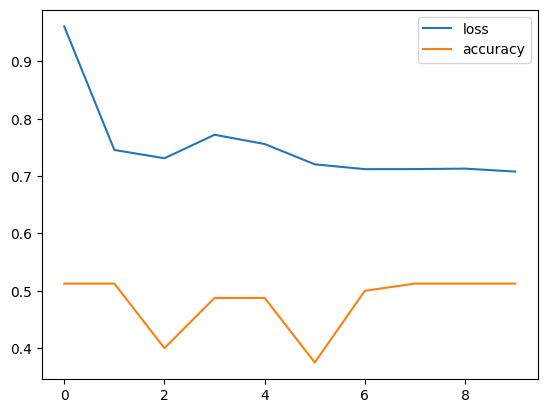

In [95]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.legend(['loss','accuracy'])